# EXPLORATORY CLIMATE ANALYSIS

In [1]:
#import dependencies

In [2]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt


In [3]:
import numpy as np
import pandas as pd


In [4]:
import datetime as dt


# Reflect Tables into SQLAlchemy ORM

In [5]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func


In [6]:
engine = create_engine("sqlite:///hawaii.sqlite")


In [7]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)


In [8]:
# We can view all of the classes that automap found
Base.classes.keys()


['measurement', 'station']

In [9]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station


In [10]:
# Create our session (link) from Python to the DB
session = Session(engine)


# PRECIPITATION ANALYSIS

In [11]:
from sqlalchemy import inspect

In [12]:
#using the inspect function to check table names and column names .

inspector = inspect(engine)
inspector.get_table_names()


['measurement', 'station']

In [13]:
# Measurement table columns
columns = inspector.get_columns('measurement')
for c in columns:
    print(c['name'], c["type"])
    

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [14]:
#Station table columns
columns = inspector.get_columns('station')
for c in columns:
    print(c['name'], c["type"])
    

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [15]:
# Calculate the date 1 year ago from the last data point in the database

latest_dt =session.query(Measurement.date).order_by(Measurement.date.desc()).first()
print("Latest date in database: " , latest_dt)

year_ago = dt.date(2017, 8, 23) - dt.timedelta(days = 365)
print("Date one year ago is: ", year_ago)


Latest date in database:  ('2017-08-23',)
Date one year ago is:  2016-08-23


In [16]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
# Perform a query to retrieve the data and precipitation scores

m_prcp = session.query(Measurement.prcp , Measurement.date).\
    filter(Measurement.date > '2016-08-23').\
    order_by(Measurement.date).all()
m_prcp


[(0.08, '2016-08-24'),
 (2.15, '2016-08-24'),
 (2.28, '2016-08-24'),
 (None, '2016-08-24'),
 (1.22, '2016-08-24'),
 (2.15, '2016-08-24'),
 (1.45, '2016-08-24'),
 (0.08, '2016-08-25'),
 (0.08, '2016-08-25'),
 (0.0, '2016-08-25'),
 (0.0, '2016-08-25'),
 (0.21, '2016-08-25'),
 (0.06, '2016-08-25'),
 (0.11, '2016-08-25'),
 (0.0, '2016-08-26'),
 (0.03, '2016-08-26'),
 (0.02, '2016-08-26'),
 (0.04, '2016-08-26'),
 (0.0, '2016-08-26'),
 (0.01, '2016-08-26'),
 (0.0, '2016-08-27'),
 (0.18, '2016-08-27'),
 (0.02, '2016-08-27'),
 (0.0, '2016-08-27'),
 (0.12, '2016-08-27'),
 (None, '2016-08-27'),
 (0.01, '2016-08-28'),
 (0.14, '2016-08-28'),
 (0.14, '2016-08-28'),
 (0.14, '2016-08-28'),
 (0.6, '2016-08-28'),
 (2.07, '2016-08-28'),
 (0.0, '2016-08-29'),
 (0.17, '2016-08-29'),
 (0.04, '2016-08-29'),
 (None, '2016-08-29'),
 (0.0, '2016-08-29'),
 (0.35, '2016-08-29'),
 (0.9, '2016-08-29'),
 (0.0, '2016-08-30'),
 (0.0, '2016-08-30'),
 (0.02, '2016-08-30'),
 (0.0, '2016-08-30'),
 (0.0, '2016-08-30'),
 (

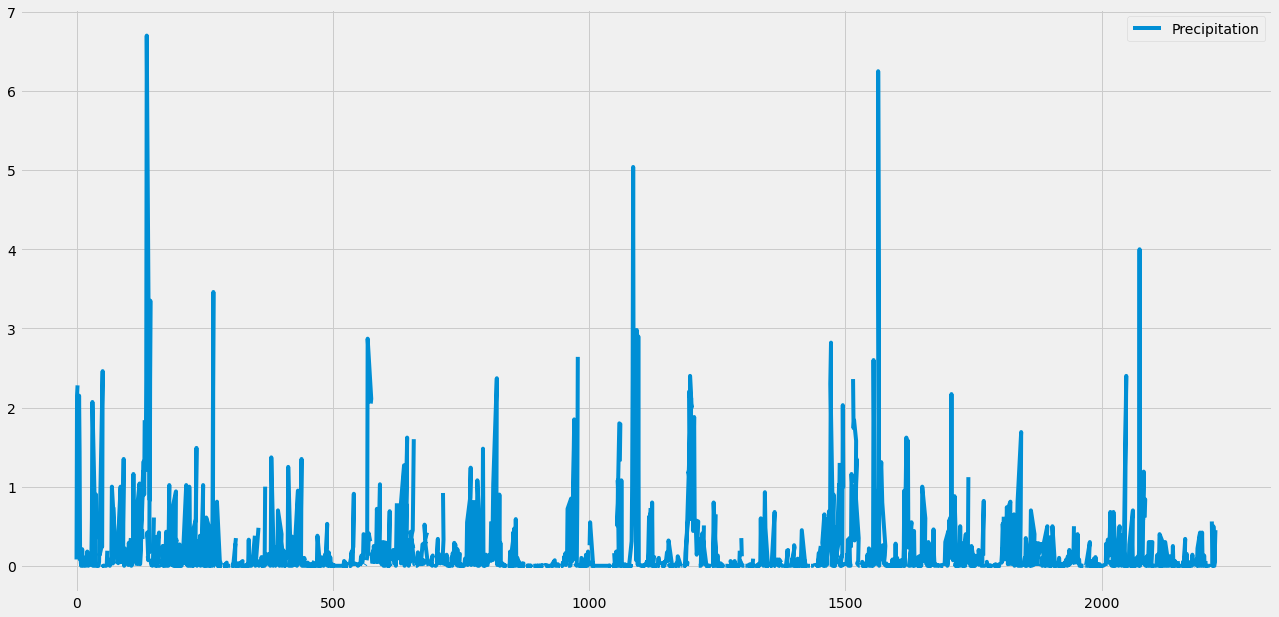

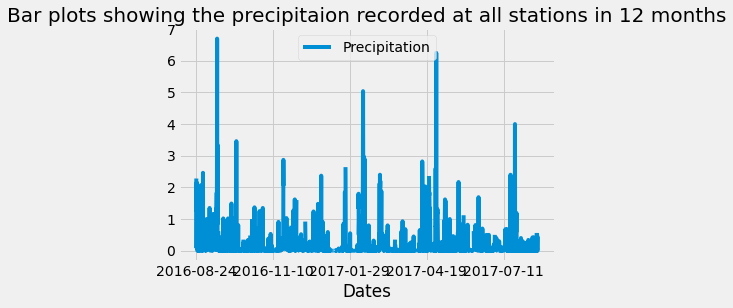

In [17]:
# Save the query results as a Pandas DataFrame and set the index to the date column


df = pd.DataFrame(m_prcp, columns = ['Precipitation', 'Dates'])
df.set_index('Dates')

# Sort the dataframe by date
df_dates = df.sort_values(by = 'Dates')

#Determine the plot size
df_dates.plot(figsize=(20,10))

# Use Pandas Plotting with Matplotlib to plot the data
df_dates.plot(x = 'Dates' , grid = True)


plt.title("Bar plots showing the precipitaion recorded at all stations in 12 months" , size = 20)
plt.show()


In [18]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df_dates.describe()

,Precipitation
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# STATION ANALYSIS

In [19]:
# Design a query to show how many stations are available in this dataset?

station_m = session.query(func.count(Measurement.station)).all()
station_m


[(19550)]

In [20]:
#Design a query to find the most active stations.
#List the stations and observation counts in descending order.
#Which station has the highest number of observations?

max_stations = session.query( Measurement.station , func.count(Measurement.station)).group_by( Measurement.station ).\
               order_by(func.count(Measurement.station).desc()).all()

max_stations


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [21]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?

temp_active_station = session.query(func.min(Measurement.tobs), func.max(Measurement.tobs),\
                      func.avg(Measurement.tobs)).\
                      filter(Measurement.station == 'USC00519281' ).all()


print("The Minimum ,Maximum and Average Temp for the most active station is :" , temp_active_station)


The Minimum ,Maximum and Average Temp for the most active station is : [(54.0, 85.0, 71.66378066378067)]


In [22]:
# Choose the station with the highest number of temperature observations.
# Calculate the one year from the latest date recorded for 'USC00519281'

last_dt = session.query (Measurement.date).filter(Measurement.station == 'USC00519281').\
          order_by(Measurement.date.desc()).first()
print("Latest date for station 'USC00519281' is: " , last_dt )


year_ago3 = dt.date(2017, 8, 18) - dt.timedelta(days = 365)
print("Date one year ago is: ", year_ago3 )


Latest date for station 'USC00519281' is:  ('2017-08-18',)
Date one year ago is:  2016-08-18


In [23]:
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


resultss =  session.query(Measurement.tobs).\
                          filter(Measurement.station == 'USC00519281' ).\
                          filter(Measurement.date >= '2017,8,23').all()

resultss


[(72.0),
 (70.0),
 (64.0),
 (63.0),
 (63.0),
 (62.0),
 (70.0),
 (70.0),
 (62.0),
 (62.0),
 (63.0),
 (65.0),
 (69.0),
 (77.0),
 (70.0),
 (74.0),
 (69.0),
 (72.0),
 (71.0),
 (69.0),
 (71.0),
 (71.0),
 (72.0),
 (72.0),
 (69.0),
 (70.0),
 (66.0),
 (65.0),
 (69.0),
 (68.0),
 (68.0),
 (68.0),
 (59.0),
 (60.0),
 (70.0),
 (73.0),
 (75.0),
 (64.0),
 (59.0),
 (59.0),
 (62.0),
 (68.0),
 (70.0),
 (73.0),
 (79.0),
 (75.0),
 (65.0),
 (70.0),
 (74.0),
 (70.0),
 (70.0),
 (71.0),
 (71.0),
 (71.0),
 (69.0),
 (61.0),
 (67.0),
 (65.0),
 (72.0),
 (71.0),
 (73.0),
 (72.0),
 (77.0),
 (73.0),
 (67.0),
 (62.0),
 (64.0),
 (67.0),
 (66.0),
 (81.0),
 (69.0),
 (66.0),
 (67.0),
 (69.0),
 (66.0),
 (68.0),
 (65.0),
 (74.0),
 (69.0),
 (72.0),
 (73.0),
 (72.0),
 (71.0),
 (76.0),
 (77.0),
 (76.0),
 (74.0),
 (68.0),
 (73.0),
 (71.0),
 (74.0),
 (75.0),
 (70.0),
 (67.0),
 (71.0),
 (67.0),
 (74.0),
 (77.0),
 (78.0),
 (67.0),
 (70.0),
 (69.0),
 (69.0),
 (74.0),
 (78.0),
 (71.0),
 (67.0),
 (68.0),
 (67.0),
 (76.0),
 (69.0),
 

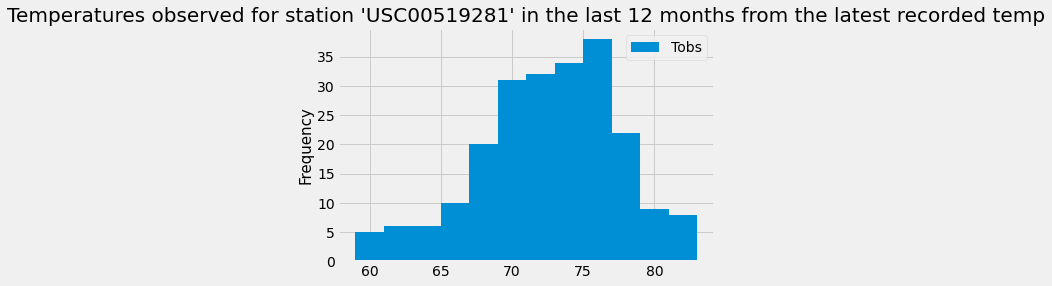

In [24]:

df3 = pd.DataFrame(resultss , columns = ['Tobs'])


df3.hist( bins = 12)

plt.ylabel("Frequency", fontsize = 15)
plt.title("Temperatures observed for station 'USC00519281' in the last 12 months from the latest recorded temp" ,
           size = 20)
labels = ["Tobs"]
plt.legend(labels)


plt.show()
